In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.integrate import cumtrapz
from scipy.integrate import solve_ivp
import matplotlib.cm as cm
from sigfig import round

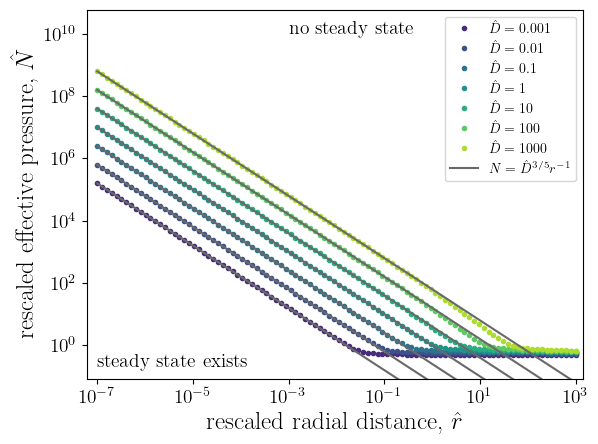

In [63]:
def Nfun(r,N,Dhat):
    a = (Dhat/r)
    b = (1/r)*(1+(1/r))*(N**9)
    find_deriv = lambda x : ((1+(a*x))**3)*x - b
    jac = lambda x : ((1+a*x)**3) + 3*((1+a*x)**2)*a*x
    if r<(1):
        approx = ((r/(Dhat**3))*(N**9))**(1/4)
    else:
        approx = (1/r)*(1+(1/r))*(N**9)
        
    dNdr = -fsolve(find_deriv,approx,fprime=jac)
    return dNdr

f = plt.figure()
cmap = cm.get_cmap('viridis', 9)

Dhat = 0.001; ri = 1e-7; Ni = (Dhat**(3/5))/ri
sol = solve_ivp(Nfun,[ri,1e3],[Ni],args = (Dhat,),max_step=1e-1,t_eval=np.logspace(-7,3,100),method='BDF') # 'RK45'
plt.loglog(sol.t,sol.y[0,:],'.',color=cmap(1),label='$\hat{D}=0.001$')
plt.plot(sol.t,(Dhat**(3/5))/sol.t,color='dimgrey')

Dhat = 0.01; Ni = (Dhat**(3/5))/ri
sol = solve_ivp(Nfun,[ri,1e3],[Ni],args = (Dhat,),max_step=1e-1,t_eval=np.logspace(-7,3,100),method='BDF') # 'RK45'
plt.loglog(sol.t,sol.y[0,:],'.',color=cmap(2),label='$\hat{D}=0.01$')
plt.plot(sol.t,(Dhat**(3/5))/sol.t,color='dimgrey')

Dhat = 0.1; Ni = (Dhat**(3/5))/ri
sol = solve_ivp(Nfun,[ri,1e3],[Ni],args = (Dhat,),max_step=1e-1,t_eval=np.logspace(-7,3,100),method='BDF') # 'RK45'
plt.loglog(sol.t,sol.y[0,:],'.',color=cmap(3),label='$\hat{D}=0.1$')
plt.plot(sol.t,(Dhat**(3/5))/sol.t,color='dimgrey')

Dhat = 1; Ni = (Dhat**(3/5))/ri
sol = solve_ivp(Nfun,[ri,1e3],[Ni],args = (Dhat,),max_step=1e-1,t_eval=np.logspace(-7,3,100),method='BDF') # 'RK45'
plt.loglog(sol.t,sol.y[0,:],'.',color=cmap(4),label='$\hat{D}=1$')
plt.plot(sol.t,(Dhat**(3/5))/sol.t,color='dimgrey')

Dhat = 10; Ni = (Dhat**(3/5))/ri
sol = solve_ivp(Nfun,[ri,1e3],[Ni],args = (Dhat,),max_step=1e-1,t_eval=np.logspace(-7,3,100),method='BDF') # 'RK45'
plt.loglog(sol.t,sol.y[0,:],'.',color=cmap(5),label='$\hat{D}=10$')
plt.plot(sol.t,(Dhat**(3/5))/sol.t,color='dimgrey')

Dhat = 100; Ni = (Dhat**(3/5))/ri
sol = solve_ivp(Nfun,[ri,1e3],[Ni],args = (Dhat,),max_step=1e-1,t_eval=np.logspace(-7,3,100),method='BDF') # 'RK45'
plt.loglog(sol.t,sol.y[0,:],'.',color=cmap(6),label='$\hat{D}=100$')
plt.plot(sol.t,(Dhat**(3/5))/sol.t,color='dimgrey')

Dhat = 1000; Ni = (Dhat**(3/5))/ri
sol = solve_ivp(Nfun,[ri,1e3],[Ni],args = (Dhat,),max_step=1e-1,t_eval=np.logspace(-7,3,100),method='BDF') # 'RK45'
plt.loglog(sol.t,sol.y[0,:],'.',color=cmap(7),label='$\hat{D}=1000$')
plt.plot(sol.t,(Dhat**(3/5))/sol.t,color='dimgrey',label='$$N = \hat{D}^{3/5} r^{-1}$$')

# plt.text(0.4e0,5e5,'$\displaystyle{\hat{D} = \\frac{D}{R^2 M^{1/8}}}$',fontsize=10)
# plt.text(0.8e-6,0.8e7,'$$N = \hat{D}^{3/5} r^{-1}$$',fontsize=14,color='dimgrey')
plt.text(1e-7,0.2,'steady state exists',fontsize=14)
plt.text(1e-3,1e10,'no steady state',fontsize=14)

# plt.plot([1e-8,1e1],[1,1],'k',linewidth=0.5)
plt.xlim(0.6e-7,1.4e3); plt.ylim(0.8e-1,0.6e11)
plt.xticks(np.logspace(-7,3,6),fontsize=14); plt.yticks(fontsize=14)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.legend(loc='upper right')
plt.xlabel('rescaled radial distance, $\hat{r}$',fontsize=18)
plt.ylabel('rescaled effective pressure, $\hat{N}$',fontsize=18)
f.savefig("effp_envelope_Dhat.pdf",bbox_inches='tight')